## Phase1: Predicting Model

In [5]:
import pandas as pd
import lightgbm as lgb
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

In [6]:
data = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

In [7]:
data.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [8]:
data.drop('Income', axis =1, inplace = True)

In [9]:
# deleting prediabetes 
data = data[data.Diabetes_012 != 1]
data

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0


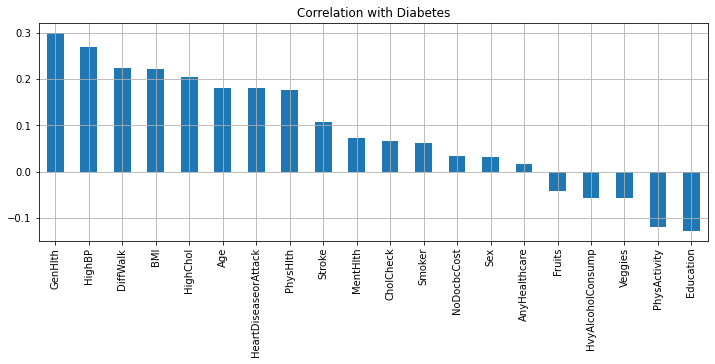

In [10]:
data.drop('Diabetes_012', axis=1).corrwith(data.Diabetes_012).sort_values(ascending=False).plot(kind='bar', grid=True, figsize=(12, 4)
, title="Correlation with Diabetes");
#df.drop('Diabetes', axis=1).corrwith(df.Diabetes).sort_values(ascending=False)

In [11]:
x = data.drop('Diabetes_012', axis = 1)
y = data['Diabetes_012']

In [12]:
from sklearn.model_selection import train_test_split

x_train,xx,y_train,yy = train_test_split(x,y,test_size = 0.8,random_state = 23) 
#x_test,x_val,y_test,y_val = train_test_split(xx,yy,test_size = 0.5,random_state = 23) 

In [13]:
clf = lgb.LGBMClassifier(boosting_type= 'gbdt', objective = 'binary',learning_rate= 0.07, n_estimators= 4000, reg_lambda = 2, 
                         max_depth = 5 , num_leaves = 20)
clf.fit(x_train,y_train)
train_predict = clf.predict(x_train)
print (metrics.accuracy_score(y_train,train_predict))

0.9116223975586741


In [14]:
test_predict = clf.predict(xx)
print (metrics.accuracy_score(yy,test_predict))

0.8567054808271432


In [15]:
# important features
im = clf.feature_importances_
col = np.array(x.columns)

dd = pd.DataFrame(im, columns=['importance'])
dd.insert(1 , 'feature name', value = col)
dd.sort_values(by = 'importance', ascending=False, inplace = True)
dd

,importance,feature name
3,15671,BMI
18,9794,Age
15,8270,PhysHlth
14,7640,MentHlth
19,5819,Education
13,4604,GenHlth
4,2162,Smoker
1,2068,HighChol
8,2029,Fruits
7,1973,PhysActivity


## Phase 2: Communication Algirithm

In [16]:
data['Label'] = ["USA"] * len(data)

In [17]:
data['Date'] = ["2015"] * len(data)

In [18]:
label = "Capchered_site"

In [19]:
data['Label'].astype(str)

0         USA
1         USA
2         USA
3         USA
4         USA
         ... 
253675    USA
253676    USA
253677    USA
253678    USA
253679    USA
Name: Label, Length: 249049, dtype: object

In [20]:
# Comment
from datetime import datetime

# datetime object containing current date and time
dt_string=datetime.now()
#dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print("date and time =", dt_string)

date and time = 2022-12-10 21:30:29.362534


In [21]:
HighBP = input(print("Do you have High Blood Pressure? (Yes/No)"))


HighBP =  list(HighBP)[0].lower()


if HighBP != "y" and "yes":
    if HighBP != "n" and "no":
        print("Wrong value! please enter yes or no")
        HighBP = input(print("Do you have High Blood Pressure? (Yes/No)"))
    elif HighBP == "n":
        HighBP = 0
elif HighBP == "y":
    HighBP = 1
    

Do you have High Blood Pressure? (Yes/No)
Noney


In [ ]:
HighBP

In [22]:
HighChol = input(print("Do you have High Blood cholesterol? (Yes/No)"))


HighChol =  list(HighChol)[0].lower()


if HighChol != "y" and "yes":
    if HighChol != "n" and "no":
        print("Wrong value! please enter yes or no")
        HighChol = input(print("Do you have High Blood cholesterol? (Yes/No)"))
    elif HighChol == "n":
        HighChol =0
elif HighChol == "y":
    HighChol = 1  
    

Do you have High Blood cholesterol? (Yes/No)
Noney


In [23]:
HighChol

1

In [24]:
CholCheck = input(print("Do you check within  Cholesterol past five years? (Yes/No)"))


CholCheck =  list(CholCheck)[0].lower()


if CholCheck != "y" and "yes":
    if CholCheck != "n" and "no":
        print("Wrong value! please enter yes or no")
        CholCheck = input(print("Do you check within  Cholesterol past five years? (Yes/No)"))
    elif CholCheck == "n":
        CholCheck =0
elif CholCheck == "y":
    CholCheck = 1  


Do you check within  Cholesterol past five years? (Yes/No)
Noney


In [25]:
CholCheck

1

In [30]:
BMI = input(print("What is your Body Mass Index? (5..100)"))

if (BMI<'5') and (BMI>'100'):
    print("Wrong value! please enter yes or no")
    BMI = input(print("What is your Body Mass Index? (5..100)"))
elif (BMI>'5') and (BMI<='100'):
    BMI = int(BMI) # Comment: Is there formula for BMI, If yes apply this formula to calculate BMI

What is your Body Mass Index? (5..100)
None70


In [31]:
BMI

'70'

In [32]:
Smoker = input(print("Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] (Yes/No)"))


Smoker =  list(Smoker)[0].lower()


if Smoker != "y" and "yes":
    if Smoker != "n" and "no":
        print("Wrong value! please enter yes or no")
        Smoker = input(print("Have you smoked at least 100 cigarettes in your entire life? (Yes/No)"))
    elif Smoker == "n":
        Smoker =0
elif Smoker == "y":
    Smoker = 1 

Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] (Yes/No)
Noney


In [33]:
Smoker

1

In [34]:
Stroke = input(print("Did you have a stroke? (Yes/No)"))


Stroke =  list(Stroke)[0].lower()


if Stroke != "y" and "yes":
    if Stroke != "n" and "no":
        print("Wrong value! please enter yes or no")
        Stroke = input(print("you had a stroke? (Yes/No)"))
    elif Stroke == "n":
        Stroke =0
elif Stroke == "y":
    Stroke = 1 

Did you have a stroke? (Yes/No)
Noney


In [35]:
Stroke

1

In [36]:
HeartDiseaseorAttack = input(print("Do you have ever coronary heart disease (CHD) or myocardial infarction (MI)? (Yes/No)"))


HeartDiseaseorAttack =  list(HeartDiseaseorAttack)[0].lower()


if HeartDiseaseorAttack != "y" and "yes":
    if HeartDiseaseorAttack != "n" and "no":
        print("Wrong value! please enter yes or no")
        HeartDiseaseorAttack = input(print("Do you have ever coronary heart disease (CHD) or myocardial infarction (MI)? (Yes/No)"))
    elif HeartDiseaseorAttack == "n":
        HeartDiseaseorAttack =0
elif HeartDiseaseorAttack == "y":
    HeartDiseaseorAttack = 1 

Do you have ever coronary heart disease (CHD) or myocardial infarction (MI)? (Yes/No)
Noney


In [37]:
HeartDiseaseorAttack

1

In [38]:
PhysActivity = input(print("Are you doing physical activity or exercise during the past 30 days other than their regular job? (Yes/No)"))


PhysActivity =  list(PhysActivity)[0].lower()


if PhysActivity != "y" and "yes":
    if PhysActivity != "n" and "no":
        print("Wrong value! please enter yes or no")
        PhysActivity = input(print("Are you doing physical activity or exercise during the past 30 days other than their regular job? (Yes/No)"))
    elif PhysActivity == "n":
        PhysActivity =0
elif PhysActivity == "y":
    PhysActivity = 1 

Are you doing physical activity or exercise during the past 30 days other than their regular job? (Yes/No)
Nonen


In [39]:
PhysActivity

0

In [40]:
Fruits = input(print("Consume Fruit 1 or more times per day? (Yes/No)"))

Fruits =  list(Fruits)[0].lower()
if Fruits != "y" and "yes":
    if Fruits != "n" and "no":
        print("Wrong value! please enter yes or no")
        Fruits = input(print("Consume Fruit 1 or more times per day? (Yes/No)"))
    elif Fruits == "n":
        Fruits =0
elif Fruits == "y":
    Fruits = 1 

Consume Fruit 1 or more times per day? (Yes/No)
Nonen


In [41]:
Fruits

0

In [42]:
Veggies = input(print("Consume Vegetables 1 or more times per day? (Yes/No)"))

Veggies =  list(Veggies)[0].lower()
if Veggies != "y" and "yes":
    if Veggies != "n" and "no":    
        print("Wrong value! please enter yes or no")
        Veggies = input(print("Consume Vegetables 1 or more times per day? (Yes/No)"))
    elif Veggies == "n":
        Veggies =0
elif Veggies == "y":
    Veggies = 1 

Consume Vegetables 1 or more times per day? (Yes/No)
Nonen


In [43]:
Veggies

0

In [44]:
HvyAlcoholConsump = input(print("Heavy drinkers_adult men having more than14drinks per week and adult women having more than7drinks per week? (Yes/No)"))

HvyAlcoholConsump =  list(HvyAlcoholConsump)[0].lower()
if HvyAlcoholConsump != "y" and "yes":
    if HvyAlcoholConsump != "n" and "no": 
        print("Wrong value! please enter yes or no")
        HvyAlcoholConsump = input(print("Heavy drinkers_adult men having more than14drinks per week and adult women having more than7drinks per week? (Yes/No)"))
    elif HvyAlcoholConsump == "n":
        HvyAlcoholConsump =0
elif HvyAlcoholConsump == "y":
    HvyAlcoholConsump = 1 

Heavy drinkers_adult men having more than14drinks per week and adult women having more than7drinks per week? (Yes/No)
Noney


In [45]:
HvyAlcoholConsump

1

In [46]:
AnyHealthcare = input(print("Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service? (Yes/No)"))

AnyHealthcare =  list(AnyHealthcare)[0].lower()
if AnyHealthcare != "y" and "yes":
    if AnyHealthcare != "n" and "no": 
        print("Wrong value! please enter yes or no")
        AnyHealthcare = input(print("Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service? (Yes/No)"))
    elif AnyHealthcare == "n":
        AnyHealthcare =0
elif AnyHealthcare == "y":
    AnyHealthcare = 1 

Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service? (Yes/No)
Nonen


In [47]:
AnyHealthcare

0

In [48]:
NoDocbcCost = input(print("Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? (Yes/No)"))

NoDocbcCost =  list(NoDocbcCost)[0].lower()
if NoDocbcCost != "y" and "yes":
    if NoDocbcCost != "n" and "no": 
        print("Wrong value! please enter yes or no")
        NoDocbcCost = input(print("Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? (Yes/No)"))
    elif NoDocbcCost == "n":
        NoDocbcCost =0
elif NoDocbcCost == "y":
    NoDocbcCost = 1 

Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? (Yes/No)
Noney


In [49]:
NoDocbcCost

1

In [50]:
GenHlth = input(print(" Would you say that in general your health is: rate (LOW:1 ~ HIGH:5)? (1..5)"))

if (GenHlth<'1') and (GenHlth>'5'):
    print("Wrong value! please enter yes or no")
    GenHlth = input(print(" Would you say that in general your health is: rate (LOW:1 ~ HIGH:5)? (1..5)"))
if (GenHlth<'1') and (GenHlth>'5'):
    print("Wrong value! please check!!!")
    GenHlth = input(print(" Would you say that in general your health is: rate (LOW:1 ~ HIGH:5)? (Please ENTER 1..5)"))
elif (GenHlth>'1') and (GenHlth<='5'):
    GenHlth = int(GenHlth)

 Would you say that in general your health is: rate (LOW:1 ~ HIGH:5)? (1..5)
None1


In [51]:
GenHlth

'1'

In [52]:
MentHlth = input(print("Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? (LOW:0 ~ HIGH:30)? (0..30)"))

if (MentHlth<'0') or (MentHlth>'30'):
    print("Wrong value! please enter yes or no")
    MentHlth = input(print("Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? (0LOW:0 ~ HIGH:30)? (0..30)"))
if (MentHlth<'0') or (MentHlth>'30'):
    print("Wrong value! please check!!!")
    MentHlth = input(print("Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? (LOW:0 ~ HIGH:30)? (Please ENTER 0..30)"))
elif (MentHlth>'0') and (MentHlth<='30'):
    MentHlth = int(MentHlth)

Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? (LOW:0 ~ HIGH:30)? (0..30)
None30


In [53]:
MentHlth

30

In [54]:
PhysHlth = input(print("Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (LOW:0 ~ HIGH:30)? (0..30)"))

if (PhysHlth<'0') or (PhysHlth>'30'):
    print("Wrong value! please enter yes or no")
    PhysHlth = input(print("Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (LOW:0 ~ HIGH:30)? (0..30)"))
if (PhysHlth<'0') or (PhysHlth>'30'):
    print("Wrong value! please check!!!")
    PhysHlth = input(print("Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (LOW:0 ~ HIGH:30)? (Please ENTER 0..30)"))
elif (PhysHlth>'0') and (PhysHlth<='30'):
    PhysHlth = int(PhysHlth)

Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (LOW:0 ~ HIGH:30)? (0..30)
None30


In [55]:
PhysHlth

30

In [56]:
DiffWalk = input(print("Do you have serious difficulty walking or climbing stairs? (Yes/No)"))

DiffWalk =  list(DiffWalk)[0].lower()
if DiffWalk != "y" and "yes":
    if DiffWalk != "n" and "no": 
        print("Wrong value! please enter yes or no")
        DiffWalk = input(print("Do you have serious difficulty walking or climbing stairs? (Yes/No)"))
    elif DiffWalk == "n":
        DiffWalk =0
elif DiffWalk == "y":
    DiffWalk = 1 

Do you have serious difficulty walking or climbing stairs? (Yes/No)
Noney


In [57]:
DiffWalk

1

In [58]:
Sex = input(print("Indicate sex of respondent (Female or Male)? (Female/Male)"))

Sex =  list(Sex)[0].lower()
if Sex != "m" and "male":
    if Sex != "f" and "female":
        print("Wrong value! please enter male or female")
        Sex = input(print("Indicate sex of respondent (Female or Male)? (Female/Male)"))
    elif Sex == "f":
        Sex =0
elif Sex == "m":
    Sex = 1 

Indicate sex of respondent (Female or Male)? (Female/Male)
Nonem


In [59]:
Sex

1

In [60]:
# Comment: Correct it
Age = input(print("please enter age"))

if (Age<'18'):
    print("Wrong value! please enter 18 years old and older")
    Age = input(print("Fourteen-level age category?"))
elif (Age>='18') and (Age<='24'):
    Age = 1
elif (Age>='25') and (Age<='29'):
    Age = 2
elif (Age>='30') and (Age<='34'):
    Age = 3
elif (Age>='35') and (Age<='39'):
    Age = 4
elif (Age>='40') and (Age<='44'):
    Age = 5
elif (Age>='45') and (Age<='49'):
    Age = 6
elif (Age>='50') and (Age<='54'):
    Age = 7
elif (Age>='55') and (Age<='59'):
    Age = 8
elif (Age>='60') and (Age<='64'):
    Age = 9
elif (Age>='65') and (Age<='69'):
    Age = 10
elif (Age>='70') and (Age<='74'):
    Age = 11
elif (Age>='75') and (Age<='79'):
    Age = 12
elif (Age>='80'):
    Age = 13

please enter age
None28


In [61]:
Age

2

In [62]:
Education = input(print("What is the highest grade or year of school you completed? (1 ~ 6)['Education'] == 1 => 'Bi Savad',['Education'] == 2 => 'Sikl,['Education'] == 3 => 'Diplom',['Education'] == 4 => 'Karshenasi',['Education'] == 5 => 'Karshenasi arshad',['Education'] == 6 => 'Doctora'? (1..6)"))

if (Education<'1') or (Education>'6'):
    print("Wrong value! please enter yes or no")
    Education = input(print("What is the highest grade or year of school you completed? (1 ~ 6)? (1..6)"))
if (Education<'1') or (Education>'6'):
    print("Wrong value! please check!!!")
    Education = input(print("What is the highest grade or year of school you completed? (1 ~ 6)? (Please ENTER 1..6)"))
elif (Education>'1') and (Education<='6'):
    Education = int(Education)

What is the highest grade or year of school you completed? (1 ~ 6)['Education'] == 1 => 'Bi Savad',['Education'] == 2 => 'Sikl,['Education'] == 3 => 'Diplom',['Education'] == 4 => 'Karshenasi',['Education'] == 5 => 'Karshenasi arshad',['Education'] == 6 => 'Doctora'? (1..6)
None3


In [63]:
Education

3

In [111]:
data.columns 

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Label',
       'Date'],
      dtype='object')

In [112]:
new_vector = [[HighBP, HighChol, CholCheck, BMI, Smoker,
       Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies,
       HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, GenHlth,
       MentHlth, PhysHlth, DiffWalk, Sex, Age, Education]]

In [113]:
new_vector

[[1, 1, 1, '70', 1, 1, 1, 0, 0, 0, 1, 0, 1, '1', 30, 30, 1, 1, 2, 3]]

In [124]:
Diabetes_Prediction = clf.predict(new_vector)
if Diabetes_Prediction == 2:
    result = "Positive"
else:
    result = "Negative"

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning:

Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.



In [125]:
result

'Positive'

In [122]:
#print("Our model predicted your diabetec test result is: {}".format(result))
#print("The accuracy of pediction model: {}".format(result))


In [123]:
print("Our model predicted that your diabetec result is: '{}'".format(result))
print("Number of participants of in this survaytion = {}\nThe accuracy of model is:  86%".format(len(data)))

Our model predicted that your diabetec result is: 'Posetive'
Number of participants of in this survaytion = 249049
The accuracy of model is:  86%


In [80]:
data0 = data[data["Age"]==Age]
data0

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Label,Date
18,0.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,15.0,0.0,0.0,0.0,2.0,6.0,USA,2015
220,0.0,0.0,0.0,1.0,22.0,1.0,0.0,0.0,0.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,2.0,4.0,USA,2015
356,0.0,0.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,0.0,3.0,0.0,0.0,1.0,0.0,2.0,4.0,USA,2015
475,0.0,0.0,1.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,4.0,2.0,0.0,0.0,2.0,6.0,USA,2015
482,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0.0,0.0,1.0,...,0.0,3.0,0.0,7.0,0.0,1.0,2.0,4.0,USA,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253637,0.0,0.0,0.0,1.0,20.0,0.0,0.0,0.0,1.0,1.0,...,0.0,3.0,0.0,0.0,0.0,0.0,2.0,5.0,USA,2015
253646,0.0,0.0,0.0,1.0,35.0,0.0,0.0,0.0,0.0,1.0,...,0.0,3.0,4.0,0.0,0.0,0.0,2.0,4.0,USA,2015
253651,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,2.0,6.0,USA,2015
253655,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,2.0,6.0,USA,2015


In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
px_template = "simple_white"

In [119]:
#ax= px.treemap(data0,path=['Age'],title="Age counts")
#ax.show()

In [83]:
pd.crosstab(data0.Age,data0.HighBP)

HighBP,0.0,1.0
Age,,
2.0,6673,871


In [84]:
pd.crosstab(data0.Age,data0.Diabetes_012)

Diabetes_012,0.0,2.0
Age,,
2.0,7404,140


In [85]:
#plt.figure(figsize=(5, 3))
#sns.histplot(data0.Age[data0.Diabetes_012 == 0], color="y", label="No Diabetic" , kde = True )
#sns.histplot(data0.Age[data0.Diabetes_012 == 1], color="b", label="Diabetic" , kde = True )
#plt.title("Relation b/w Age and Diabetes")

#plt.xticks(data0["Age"].unique())
#plt.legend()

In [86]:
diabetes_bp = data0.groupby(['Diabetes_012', 'Age']).size().reset_index(name = 'Count')
print(diabetes_bp)

   Diabetes_012  Age  Count
0           0.0  2.0   7404
1           2.0  2.0    140


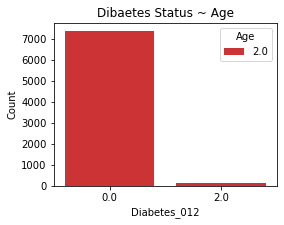

In [87]:
plt.figure(figsize = (4,3))
sns.barplot(x = 'Diabetes_012', y = 'Count', hue = 'Age', data = diabetes_bp, palette = 'Set1')
plt.title("Dibaetes Status ~ Age")
plt.show()

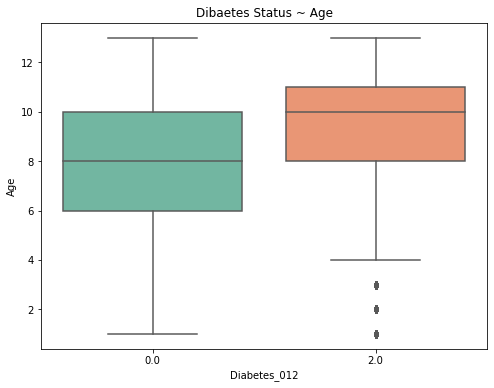

In [88]:
plt.figure(figsize = (8,6))
sns.boxplot(data = data, x = 'Diabetes_012', y = 'Age', palette = 'Set2')
plt.title("Dibaetes Status ~ Age")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


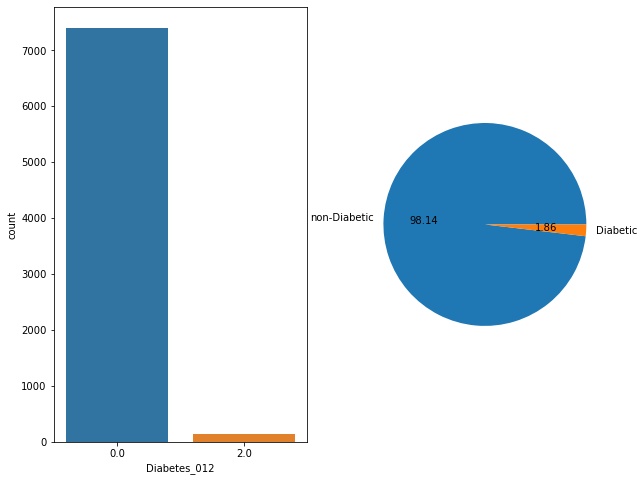

In [89]:
figure1, plot1 = plt.subplots(1,2,figsize=(10,8))

sns.countplot(data0['Diabetes_012'],ax=plot1[0])



labels=["non-Diabetic","Diabetic"]

plt.pie(data0["Diabetes_012"].value_counts() , labels =labels ,autopct='%.02f' );

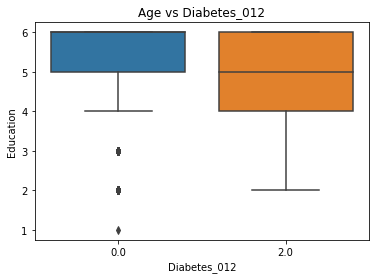

In [90]:
sns.boxplot(x = 'Diabetes_012', y = 'Education', data = data0)
plt.title('Age vs Diabetes_012')
plt.show()

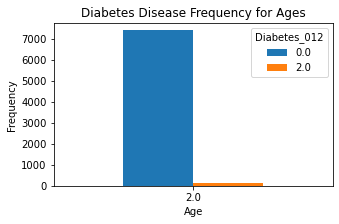

In [91]:
pd.crosstab(data0.Age,data0.Diabetes_012).plot(kind="bar",figsize=(5,3))
plt.title('Diabetes Disease Frequency for Ages')
plt.xlabel('Age')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

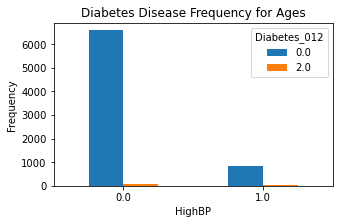

In [92]:
pd.crosstab(data0.HighBP,data0.Diabetes_012).plot(kind="bar",figsize=(5,3))
plt.title('Diabetes Disease Frequency for Ages')
plt.xlabel('HighBP')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

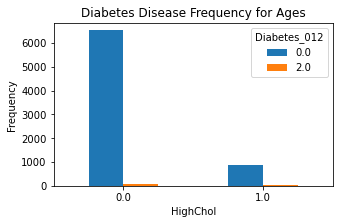

In [93]:
pd.crosstab(data0.HighChol,data0.Diabetes_012).plot(kind="bar",figsize=(5,3))
plt.title('Diabetes Disease Frequency for Ages')
plt.xlabel('HighChol')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

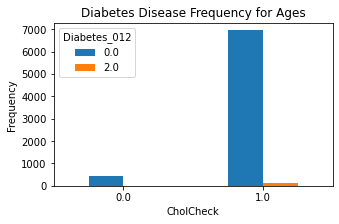

In [94]:
pd.crosstab(data0.CholCheck,data0.Diabetes_012).plot(kind="bar",figsize=(5,3))
plt.title('Diabetes Disease Frequency for Ages')
plt.xlabel('CholCheck')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

In [95]:
#pd.crosstab(data0.BMI,data0.Diabetes_012).plot(kind="bar",figsize=(100,30))
#plt.title('Diabetes Disease Frequency for Ages')
#plt.xlabel('BMI')
#plt.xticks(rotation=0)
#plt.ylabel('Frequency')
#plt.show()

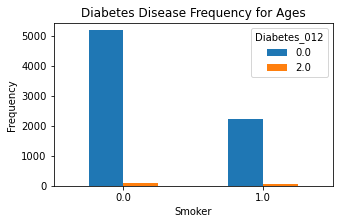

In [96]:
pd.crosstab(data0.Smoker,data0.Diabetes_012).plot(kind="bar",figsize=(5,3))
plt.title('Diabetes Disease Frequency for Ages')
plt.xlabel('Smoker')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

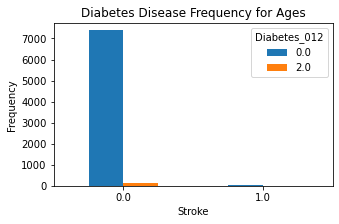

In [97]:
pd.crosstab(data0.Stroke,data0.Diabetes_012).plot(kind="bar",figsize=(5,3))
plt.title('Diabetes Disease Frequency for Ages')
plt.xlabel('Stroke')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

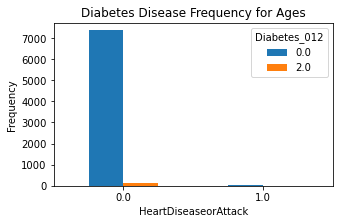

In [98]:
pd.crosstab(data0.HeartDiseaseorAttack,data0.Diabetes_012).plot(kind="bar",figsize=(5,3))
plt.title('Diabetes Disease Frequency for Ages')
plt.xlabel('HeartDiseaseorAttack')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

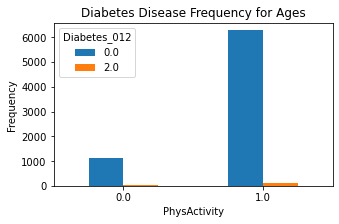

In [99]:
pd.crosstab(data0.PhysActivity,data0.Diabetes_012).plot(kind="bar",figsize=(5,3))
plt.title('Diabetes Disease Frequency for Ages')
plt.xlabel('PhysActivity')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

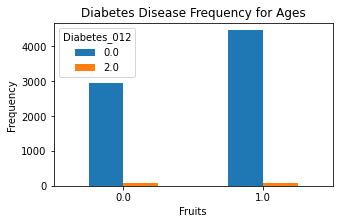

In [100]:
pd.crosstab(data0.Fruits,data0.Diabetes_012).plot(kind="bar",figsize=(5,3))
plt.title('Diabetes Disease Frequency for Ages')
plt.xlabel('Fruits')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

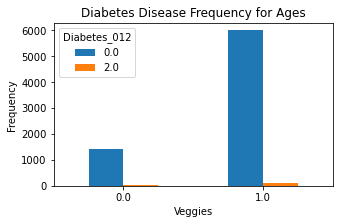

In [101]:
pd.crosstab(data0.Veggies,data0.Diabetes_012).plot(kind="bar",figsize=(5,3))
plt.title('Diabetes Disease Frequency for Ages')
plt.xlabel('Veggies')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

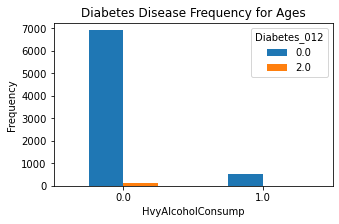

In [102]:
pd.crosstab(data0.HvyAlcoholConsump,data0.Diabetes_012).plot(kind="bar",figsize=(5,3))
plt.title('Diabetes Disease Frequency for Ages')
plt.xlabel('HvyAlcoholConsump')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

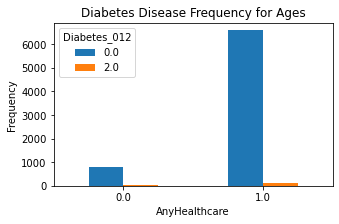

In [103]:
pd.crosstab(data0.AnyHealthcare,data0.Diabetes_012).plot(kind="bar",figsize=(5,3))
plt.title('Diabetes Disease Frequency for Ages')
plt.xlabel('AnyHealthcare')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

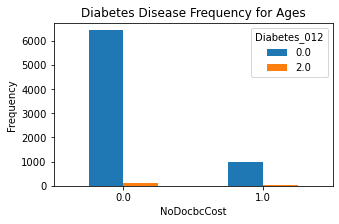

In [104]:
pd.crosstab(data0.NoDocbcCost,data0.Diabetes_012).plot(kind="bar",figsize=(5,3))
plt.title('Diabetes Disease Frequency for Ages')
plt.xlabel('NoDocbcCost')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

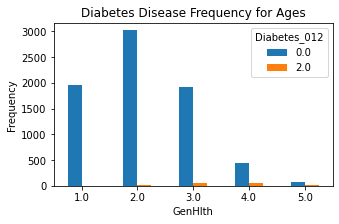

In [105]:
pd.crosstab(data0.GenHlth,data0.Diabetes_012).plot(kind="bar",figsize=(5,3))
plt.title('Diabetes Disease Frequency for Ages')
plt.xlabel('GenHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

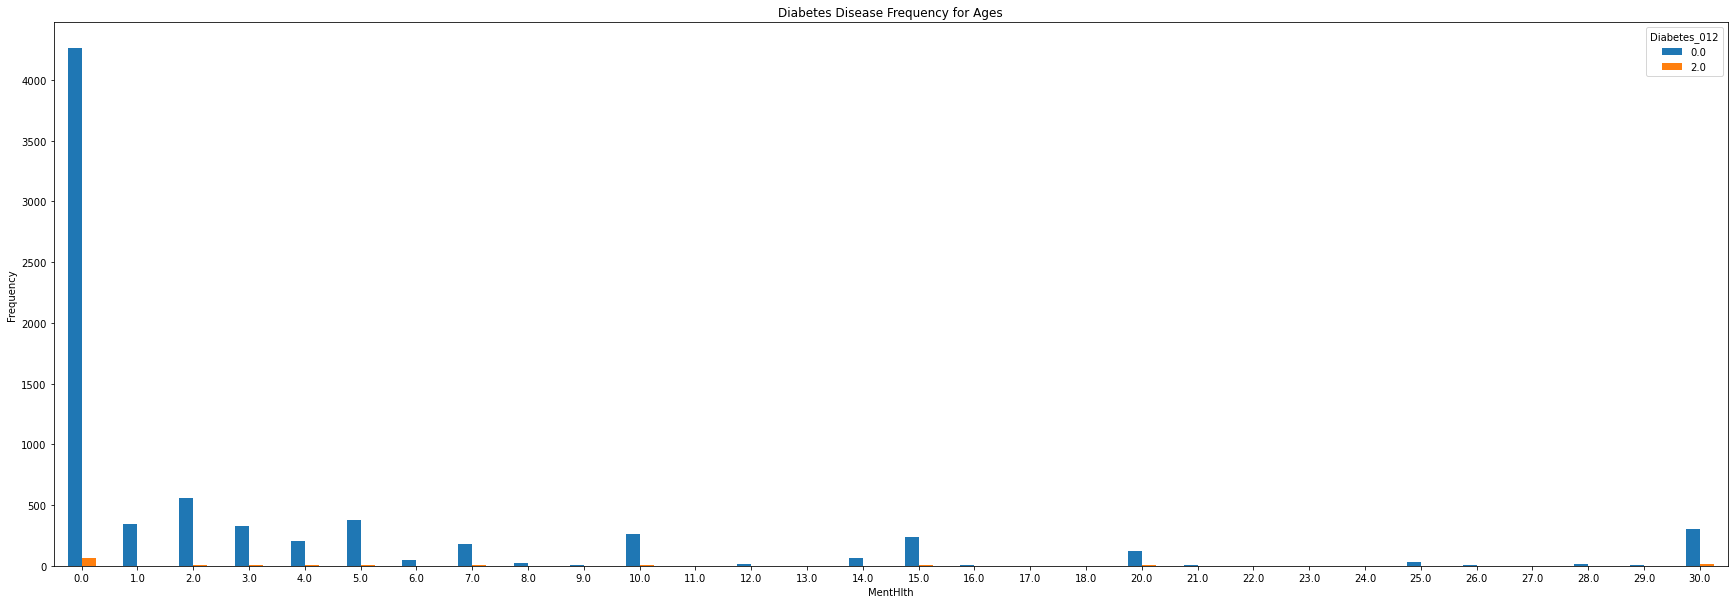

In [106]:
pd.crosstab(data0.MentHlth,data0.Diabetes_012).plot(kind="bar",figsize=(30,10))
plt.title('Diabetes Disease Frequency for Ages')
plt.xlabel('MentHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

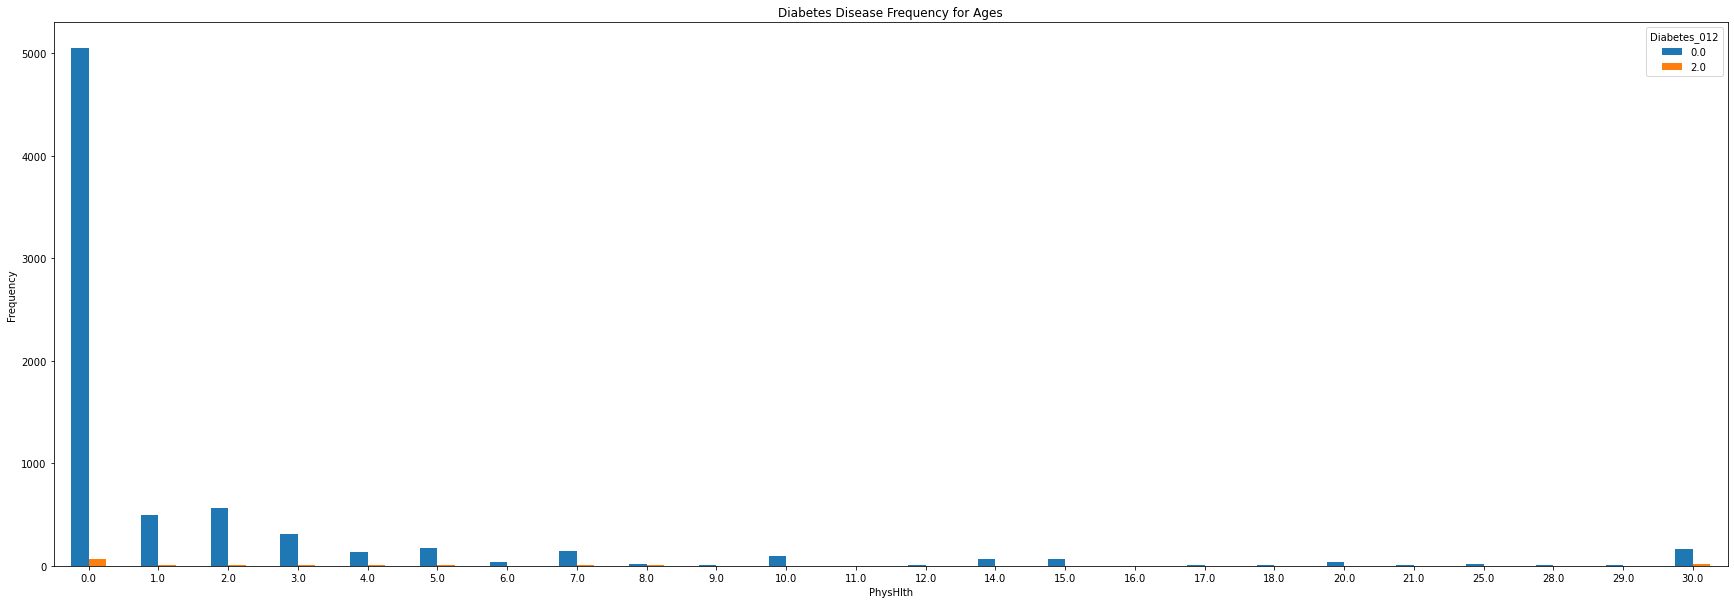

In [107]:
pd.crosstab(data0.PhysHlth,data0.Diabetes_012).plot(kind="bar",figsize=(30,10))
plt.title('Diabetes Disease Frequency for Ages')
plt.xlabel('PhysHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

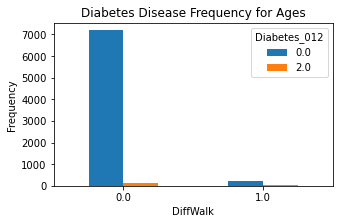

In [108]:
pd.crosstab(data0.DiffWalk,data0.Diabetes_012).plot(kind="bar",figsize=(5,3))
plt.title('Diabetes Disease Frequency for Ages')
plt.xlabel('DiffWalk')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

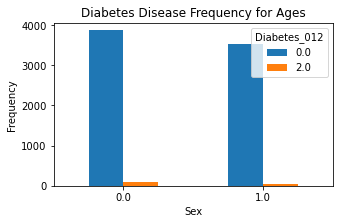

In [109]:
pd.crosstab(data0.Sex,data0.Diabetes_012).plot(kind="bar",figsize=(5,3))
plt.title('Diabetes Disease Frequency for Ages')
plt.xlabel('Sex')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

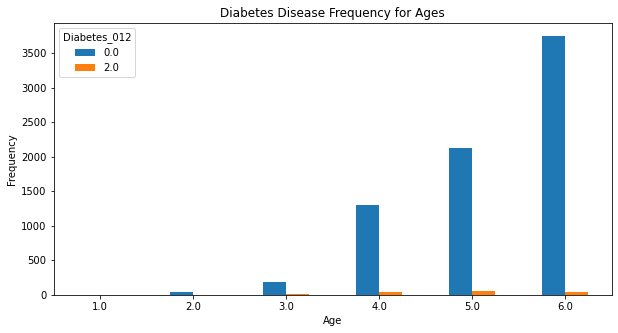

In [110]:
pd.crosstab(data0.Education,data0.Diabetes_012).plot(kind="bar",figsize=(10,5))
plt.title('Diabetes Disease Frequency for Ages')
plt.xlabel('Age')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()